# Homework 2

### Instructions
Download this jupyer notebook (button at the top of the page or download from the Github repository). Provide your answers as Markdown text, Python code, and/or produce plots as appropriate. The notebook should run all the cells in order without errors.  
Submit both the `.ipynb` and a `.pdf` to Canvas.

Make sure the `.pdf` has all the relevant outputs showing. To save as `.pdf` you can first export the notebook as `.html`, open it in a browers and then "Print to PDF". 

**NOTE:** As we will be sharing the files for peer grading, please keep your submission anonymous.

## Problem 1 (Stochastic dynamic programming)
*(Adapted from Stanford AA 203)*

In this problem we will explore discrete-time dynamic programming for stochastic systems; that is, systems where the result of taking a certain action is not deterministic, but instead any of a set of results may occur, according to some known probability distribution. In this case, we cannot optimize the value function directly, since even choosing a known sequence of actions will not always give in the same result. Instead, we optimize the [_expected value_](https://en.wikipedia.org/wiki/Expected_value) of the value function instead (if it's been a while since you've taken a probability class, or if you've never taken one, that Wikipedia article may be helpful).




## (a) Small hand-calculation problem

Suppose we have a machine that is either running or is broken down. If it runs throughout one
week, it makes a gross profit of \$100. If it fails during the week, gross profit is zero. If it is running at the start of the week and we perform preventive maintenance, the probability that it will fail during the week is 0.4. If we do not perform such maintenance, the probability of failure is 0.7. However, maintenance will cost \$20. If the machine is broken down at the start of the week, it may either be repaired at a cost of \$40, in which case it will fail during the week with a probability
of 0.4, or it may be replaced at a cost of \$150 by a new machine; a new machine is guaranteed to run through its first week of operation. Using dynamic programming, find the optimal repair, replacement, and maintenance policy that maximizes total expected profit over four weeks, assuming a new machine at the start of the first week.

Including image of hand calculations in PDF.

## (b) Larger system to solve by code

Now we consider a more complicated system and a longer time horizon.

Consider the same scenario as above, but with two additional machine states: overspeeding and destroyed. In the overspeeding state, the machine will with probability 0.5 produce \$120 at the end of the week, but will otherwise be destroyed and produce no revenue for that week. If the machine is in the "destroyed" state at the start of a week, it may be replaced with a new machine for \$150, the same as if it were broken down; otherwise it will produce no revenue for that week and remain in the destroyed state. A destroyed machine may not be repaired.

Here are the state transitions possible in this new system:

- If the machine is in the "running" state at the start of the week:
    - If you do nothing (cost: \$0)
        - With probability 0.3 it will produce \$100 and remain in the "running" state at the end of the week.
        - With probabiity 0.63 it will produce \$0 and enter the "broken down" state at the end of the week.
        - With probability 0.07 it will produce \$100 and enter the "overspeeding" state at the end of the week.
    - If you maintain the machine (cost: \$20):
        - With probability 0.6 it will produce \$100 and remain in the "running" state at the end of the week.
        - With probabiity 0.37 it will produce \$0 and enter the "broken down" state at the end of the week.
        - With probability 0.03 it will produce \$100 and enter the "overspeeding" state at the end of the week.
- If the machine is in the "broken down" state at the start of the week:
    - If you do nothing (cost: \$0):
        - The machine will produce \$0, and will remain in the "broken down" state at the end of the week.
    - If you repair the machine (cost: \$40):
        - With probability 0.6 it will produce \$100 and remain in the "running" state at the end of the week.
        - With probabiity 0.37 it will produce \$0 and enter the "broken down" state at the end of the week.
        - With probability 0.03 it will produce \$100 and enter the "overspeeding" state at the end of the week.
    - If you replace the machine (cost: \$150):
        - The new machine will produce \$100 and be in the "running" state at the end of the week.
- If the machine is in the "overspeeding" state at the start of the week:
    - If you do nothing (cost: \$0):
        - With probability 0.5 it will produce \$120 and remain in the "overspeeding" state at the end of the week.
        - With probability 0.5 it will produce \$0 and enter the "destroyed" state at the end of the week.
    - If you repair the machine (cost: \$40):
        - With probability 0.6 it will produce \$100 and remain in the "running" state at the end of the week.
        - With probabiity 0.37 it will produce \$0 and enter the "broken down" state at the end of the week.
        - With probability 0.03 it will produce \$100 and enter the "overspeeding" state at the end of the week.
- If the machine is in the "destroyed" state at the start of the week:
    - If you do nothing (cost: \$0):
        - The machine will produce \$0 and remain in the "destroyed" state at the end of the week.
    - If you replace the machine (cost: \$150):
        - The new machine will produce \$100 and be in the "running" state at the end of the week.






Suppose that by the end of the 20th week (i.e., start of the 21st week), the machine is still "running", then you can sell the machine for \$200. 
If the machine is "overspeeding", the machine will sell for \$120.
If the machine is "broken down", the machine will sell for \$30.
If the machine is "destroyed", then you must pay for a recycling fee of \$50.

In the following parts, you will implement the dynamic programming algorithm to find the optimal action to take in each state in each week, as well as the optimal expected profit in each state in each week. 

### (b)(i) Quick hand calculation
Let's start by considering just the last week and computing the first dynamic programming step by hand.
What is the value at the start of week 21? That is, what is the terminal value?



The terminal values are given for week 21. Running = 200, Overspeeding = 120, Broken Down = 30, Destroyed = 50.


### (b)(ii)
Given that, what is the value at the start of week 20 and the corresponding optimal policy?    


Adding a picture to the PDF file. The hand-calculated optimal policy is:

Running + Maintenance: 134.7
Breakdown + Replace: 200
Overspeeding + Repair: 134.7
Destroyed + Replace: 200


### (b)(iii)

Now, fill in the following functions to compute the value function and optimal policy over the 20 weeks.

Print out the optimal policy and value function.


In [104]:
import numpy as np

In [105]:
# these are the states and actions of the system, and corresponding index 
STATES = {"RUNNING": 0, "BROKEN_DOWN": 1, "OVERSPEEDING": 2, "DESTROYED": 3}
ACTIONS = {"NOTHING": 0, "MAINTAIN": 1, "REPAIR": 2, "REPLACE": 3}


In [106]:
def construct_transition_probability_matrix(STATES, ACTIONS):
    """
    Construct the transition probability matrix for the car maintenance problem.
    The transition probability matrix is a 3D array where the first dimension
    represents the current state, the second dimension represents the next state,
    and the third dimension represents the action taken.
    """

    tpm = np.zeros((len(STATES),len(STATES),len(ACTIONS))) #4x4x4 3D array #transitional probability matrix

    #Runnning, Nothing
    tpm[STATES["RUNNING"]][STATES["RUNNING"]][ACTIONS["NOTHING"]] = 0.3 # running
    tpm[STATES["RUNNING"]][STATES["BROKEN_DOWN"]][ACTIONS["NOTHING"]] = 0.63 # bd
    tpm[STATES["RUNNING"]][STATES["OVERSPEEDING"]][ACTIONS["NOTHING"]] = 0.07 # os

    #Running, maintain
    tpm[STATES["RUNNING"]][STATES["RUNNING"]][ACTIONS["MAINTAIN"]] = 0.6 # running running maintain
    tpm[STATES["RUNNING"]][STATES["BROKEN_DOWN"]][ACTIONS["MAINTAIN"]] = 0.37 # bd
    tpm[STATES["RUNNING"]][STATES["OVERSPEEDING"]][ACTIONS["MAINTAIN"]] = 0.03 # os

    #Broken down, nothing
    tpm[STATES["BROKEN_DOWN"]][STATES["BROKEN_DOWN"]][ACTIONS["NOTHING"]] = 1 #broken down

    #broken down, repair
    tpm[STATES["BROKEN_DOWN"]][STATES["RUNNING"]][ACTIONS["REPAIR"]] = 0.6
    tpm[STATES["BROKEN_DOWN"]][STATES["BROKEN_DOWN"]][ACTIONS["REPAIR"]] = 0.37
    tpm[STATES["BROKEN_DOWN"]][STATES["OVERSPEEDING"]][ACTIONS["REPAIR"]] = 0.03

    #Overspeeding, repair
    tpm[STATES["OVERSPEEDING"]][STATES["RUNNING"]][ACTIONS["REPAIR"]] = 0.6
    tpm[STATES["OVERSPEEDING"]][STATES["BROKEN_DOWN"]][ACTIONS["REPAIR"]] = 0.37
    tpm[STATES["OVERSPEEDING"]][STATES["OVERSPEEDING"]][ACTIONS["REPAIR"]] = 0.03

    #Replaced
    tpm[STATES["BROKEN_DOWN"]][STATES["RUNNING"]][ACTIONS["REPLACE"]] = 1 #BD

    tpm[STATES["DESTROYED"]][STATES["RUNNING"]][[ACTIONS["REPLACE"]]] = 1 #DS

    #Overspeeding, nothing
    tpm[STATES["OVERSPEEDING"]][STATES["OVERSPEEDING"]][ACTIONS["NOTHING"]] = 0.5
    tpm[STATES["OVERSPEEDING"]][STATES["DESTROYED"]][ACTIONS["NOTHING"]] = 0.5

    #Destroyed, nothing
    tpm[STATES["DESTROYED"]][STATES["DESTROYED"]][ACTIONS["NOTHING"]] = 1 #DS 
 
    return tpm
    ########################


In [107]:
def construct_reward_matrix(STATES, ACTIONS):
    """
    Construct the reward matrix for the car maintenance problem.
    The reward matrix is a 3D array where the first dimension
    represents the current state, the second dimension represents the next state,
    and the third dimension represents the action taken.
    """ 
    rm = np.zeros((len(STATES),len(STATES),len(ACTIONS))) #4x4x4 3D array #reward matrix
    
    #Runnning, Nothing
    rm[STATES["RUNNING"]][STATES["RUNNING"]][ACTIONS["NOTHING"]] = 100 # running
    rm[STATES["RUNNING"]][STATES["BROKEN_DOWN"]][ACTIONS["NOTHING"]] = 0 # bd
    rm[STATES["RUNNING"]][STATES["OVERSPEEDING"]][ACTIONS["NOTHING"]] = 100 # os

    #Running, maintain
    rm[STATES["RUNNING"]][STATES["RUNNING"]][ACTIONS["MAINTAIN"]] = 100 - 20 # running running maintain
    rm[STATES["RUNNING"]][STATES["BROKEN_DOWN"]][ACTIONS["MAINTAIN"]] = 0 - 20 # bd
    rm[STATES["RUNNING"]][STATES["OVERSPEEDING"]][ACTIONS["MAINTAIN"]] = 100 - 20 # os

    #Broken down, nothing
    rm[STATES["BROKEN_DOWN"]][STATES["BROKEN_DOWN"]][ACTIONS["NOTHING"]] = 0 #broken down

    #broken down, repair
    rm[STATES["BROKEN_DOWN"]][STATES["RUNNING"]][ACTIONS["REPAIR"]] = 100 - 40
    rm[STATES["BROKEN_DOWN"]][STATES["BROKEN_DOWN"]][ACTIONS["REPAIR"]] = 0 - 40
    rm[STATES["BROKEN_DOWN"]][STATES["OVERSPEEDING"]][ACTIONS["REPAIR"]] = 100 - 40

    #Overspeeding, repair
    rm[STATES["OVERSPEEDING"]][STATES["RUNNING"]][ACTIONS["REPAIR"]] = 100 - 40
    rm[STATES["OVERSPEEDING"]][STATES["BROKEN_DOWN"]][ACTIONS["REPAIR"]] = 0 - 40
    rm[STATES["OVERSPEEDING"]][STATES["OVERSPEEDING"]][ACTIONS["REPAIR"]] = 100 - 40

    #Replaced
    rm[STATES["BROKEN_DOWN"]][STATES["RUNNING"]][ACTIONS["REPLACE"]] = 100 - 150 #BD

    rm[STATES["DESTROYED"]][STATES["RUNNING"]][ACTIONS["REPLACE"]] = 100 - 150 #DS

    #Overspeeding, nothing
    rm[STATES["OVERSPEEDING"]][STATES["OVERSPEEDING"]][ACTIONS["NOTHING"]] = 120 # overspeeding
    rm[STATES["OVERSPEEDING"]][STATES["DESTROYED"]][ACTIONS["NOTHING"]] = 0  #broken down

    #Destroyed, nothing
    rm[STATES["DESTROYED"]][STATES["DESTROYED"]][ACTIONS["NOTHING"]] = 0 #DS

    return rm
    ########################

In [108]:
def allowable_action_set(state):
    """
    Returns the set of actions that are allowed in the given state.
    """
    if state == "RUNNING":
        return ["NOTHING", "MAINTAIN"]
    elif state == "BROKEN_DOWN":
        return ["NOTHING", "REPAIR", "REPLACE"]
    elif state == "OVERSPEEDING":
        return ["NOTHING", "REPAIR"]
    elif state == "DESTROYED":
        return ["NOTHING", "REPLACE"]
    

In [109]:
probability_matrix = construct_transition_probability_matrix(STATES, ACTIONS)
reward_matrix = construct_reward_matrix(STATES, ACTIONS)

n_weeks = 20

V = np.zeros((len(STATES), n_weeks+1))
V[:,-1] = np.array([200, 30, 120, -50])  # RUNNING, BROKEN_DOWN, OVERSPEEDING, DESTROYED

policy = {}
for t in range(n_weeks + 1):  # Initialize policy for all time steps
    for curr_state_name, curr_state_num in STATES.items():
        policy[(curr_state_name, t)] = None  # Set a default value (None) for all states

##### FILL ME IN #####
# update value function for each state and time step
# Use the Bellman equation to update the value function

for t in reversed(range(n_weeks)): # iterating backwards
    for curr_state_name, curr_state_num in STATES.items(): #for every state in dict STATES
        max_value = float('-inf') # initial max value starts at the minimum so it can be updated
        best_action = None # init best actions

        #iterate through each action at state
        for action_name, action_num in ACTIONS.items(): # for every action in dict ACTIONS
            expected_value = 0 #init expected valye
            for next_state_name, next_state_num in STATES.items(): # for every state in dict STATES (next states)
                
                prob = probability_matrix[curr_state_num][next_state_num][action_num]
                reward = reward_matrix[curr_state_num][next_state_num][action_num]
                expected_value += prob * (reward + V[next_state_num][t + 1]) # sum prob dist of costs of action movement to next state for a specifc option
            
            #total_value = reward + expected_value # Add reward /term cost/ at the next state

            if expected_value > max_value:
                max_value = expected_value
                best_action = action_name

        V[curr_state_num][t] = max_value #max value at timestep t
        policy[(curr_state_name, t)] = best_action #best action at tiemstep t


##################


##### UNCOMMENT THE FOLLOWING CODE #####

print(STATES)
for t in range(n_weeks):
    print("Week %i,:"%(t+1), [policy[(state, t)] for state in STATES.keys()])
    
for t in range(n_weeks+1):
    print("Week %i,:"%(t+1), [np.round(V[(STATES[state], t)], 2).item() for state in STATES.keys()])


{'RUNNING': 0, 'BROKEN_DOWN': 1, 'OVERSPEEDING': 2, 'DESTROYED': 3}
Week 1,: ['MAINTAIN', 'REPAIR', 'REPAIR', 'REPLACE']
Week 2,: ['MAINTAIN', 'REPAIR', 'REPAIR', 'REPLACE']
Week 3,: ['MAINTAIN', 'REPAIR', 'REPAIR', 'REPLACE']
Week 4,: ['MAINTAIN', 'REPAIR', 'REPAIR', 'REPLACE']
Week 5,: ['MAINTAIN', 'REPAIR', 'REPAIR', 'REPLACE']
Week 6,: ['MAINTAIN', 'REPAIR', 'REPAIR', 'REPLACE']
Week 7,: ['MAINTAIN', 'REPAIR', 'REPAIR', 'REPLACE']
Week 8,: ['MAINTAIN', 'REPAIR', 'REPAIR', 'REPLACE']
Week 9,: ['MAINTAIN', 'REPAIR', 'REPAIR', 'REPLACE']
Week 10,: ['MAINTAIN', 'REPAIR', 'REPAIR', 'REPLACE']
Week 11,: ['MAINTAIN', 'REPAIR', 'REPAIR', 'REPLACE']
Week 12,: ['MAINTAIN', 'REPAIR', 'REPAIR', 'REPLACE']
Week 13,: ['MAINTAIN', 'REPAIR', 'REPAIR', 'REPLACE']
Week 14,: ['MAINTAIN', 'REPAIR', 'REPAIR', 'REPLACE']
Week 15,: ['MAINTAIN', 'REPAIR', 'REPAIR', 'REPLACE']
Week 16,: ['MAINTAIN', 'REPAIR', 'REPAIR', 'REPLACE']
Week 17,: ['MAINTAIN', 'REPAIR', 'REPAIR', 'REPLACE']
Week 18,: ['MAINTAIN', 

# Problem 2 (Value iteration)
*(This problem is adapted from Stanford AA203 course)*

In this problem, you will implement value iteration to compute the value function for a rescue drone that needs to deliver aid to a goal state while avoiding regions with fire and uncertain wind conditions.

The world is represented as an $n \times n$ grid, i.e., the state space is

$$ \mathcal{S}  := \lbrace(x_1, x_2) \in \mathbb{Z}_+^2 \mid | x_1, x_2 \in \lbrace 0, 1 . . . , n − 1\rbrace\rbrace \cup \lbrace (\texttt{None}, \texttt{None}) \rbrace, .$$

In these coordinates, $(0, 0)$ represents the bottom left corner of the map and $(n−1, n−1)$ represents the top right corner of the map. While $(\texttt{None}, \texttt{None})$ is a terminal state. For any non-terminal state, from any location $x = (x_1, x_2) \in \mathcal{S}$, the drone has four possible directions it can move in, i.e.,

$$ \mathcal{A}:= \lbrace \texttt{up}, \texttt{down}, \texttt{left}, \texttt{right} \rbrace.$$

The corresponding state changes for each action are:
- $\texttt{up}: (x_1, x_2) \mapsto (x_1, x_2+1)$ 
- $\texttt{down}: (x_1, x_2) \mapsto (x_1, x_2-1)$ 
- $\texttt{left}: (x_1, x_2) \mapsto (x_1-1, x_2)$ 
- $\texttt{right}: (x_1, x_2) \mapsto (x_1+1, x_2)$ 

There is a storm centered at $x_\mathrm{eye} \in \mathcal{S}$. The storm’s influence is strongest at its center and decays farther from the center according to the equation 

$$ \omega(x) = \exp\biggl( -\frac{\| x - x_\mathrm{eye}\|_2^2}{2\sigma^2}\biggr)$$

Given its current state $x$ and action $a$, the drone’s next state is determined as follows:
- With probability $\omega(x)$, the storm will cause the drone to move in a uniformly random direction.
- With probability $1 − \omega(x)$, the drone will move in the direction specified by the action.
- If the resulting movement would cause the drone to leave $\mathcal{S}$, then it will not move at all. For example, if the drone is on the right boundary of the map, then moving right will do nothing.
- If the drone reaches the goal state, then the drone will always transition to a *terminal state* $(\texttt{None}, \texttt{None}).$ Once in the terminal state, the drone remains in that state indefinitely regardless of the action taken.

The drone's objective is to reach $x_\mathrm{goal} \in \mathcal{S}$. If the drone reaches the goal state, then it receives a reward of $r_\mathrm{goal}$ (successfully delivers aid), and a reward of $r_\mathrm{travel}$ otherwise (cost of traveling one unit). Additionally, there are some states where there is a fire. If the drone reaches a state where there is a fire, then it receives a reward of $r_\mathrm{fire}$ (drone suffers damage). Once the drone is in the terminal state, it receives zero reward (i.e., mission has terminated). The reward of a trajectory in this infinite horizon problem is a discounted sum of the rewards earned in each timestep, with discount factor $\gamma \in (0, 1)$.

To find the optimal policy to reach the goal state from any starting location, we perform value iteration. Recall that the value iteration repeats the Bellman update until convergence.

$$ V(x) \leftarrow \max_{a\in\mathcal{A}} \biggl( \sum_{x^\prime \in \mathcal{S}} p(x, a, x^\prime) (R(x^\prime) + \gamma V(x^\prime))\biggr) $$

## (a) Problem set up
Below are some helper functions. Some are filled in, others you will you need to fill in yourself.

In [110]:
import numpy as np
import matplotlib.pyplot as plt
from ipywidgets import interact
import functools


In [111]:
def is_terminal_state(state):
    """
    Check if the state is a terminal state.
    Args:
        state: Current state (row, column).
    Returns:
        True if the state is terminal, False otherwise.
    """
    return state == (None, None)


def _state_space(max_rows, max_columns):
    return [(i, j) for i in range(max_rows) for j in range(max_columns)] + [(None, None)]


def _reward(state, fire_states, goal_states, fire_value, goal_value, travel_value):
    """
    Reward function for the grid world.
    Args:
        state: Current state (row, column).
        fire_states: List or set of fire states.
        goal_states: List or set of goal states.
        fire_value: Reward value for fire states.
        goal_value: Reward value for goal states.
    Returns:
        Reward value for the current state.
    """
    #### FILL CODE HERE ####
    if state in fire_states:
        return fire_value
    elif state in goal_states:
        return goal_value
    else:
        return travel_value
    ########################
    
def _transition_function(s, a, w=0, 
                        max_rows=20, # number of rows
                        max_columns=20, # number of columns
                        goal_states=set([]), 
                        action_set=["down", "right", "up", "left"]):
    """
    Transition function for the grid world.
    Args:
        s: Current state (row, column).
        a: Action to take.
        w: Probability of taking the action.
        max_rows: Number of rows in the grid.
        max_columns: Number of columns in the
            grid.
        action_set: List of possible actions.
    Returns:
        New state after taking the action.
    """
    i,j = s
    if is_terminal_state(s) or (s in goal_states):
        #print(f"Transitioning from state {s} to terminal (None, None)")
        return (None, None)
    if (np.random.rand(1) < w)[0]: #random movement due to storm
        a = np.random.choice(action_set)
    if a == "up":
        return (min(i+1, max_rows-1), j)
    if a == "right":
        return (i, min(j+1, max_columns-1))
    if a == "down":
        return (max(i-1, 0), j)
    if a == "left":
        return (i, max(j-1, 0))

    
def _compute_omega_probability(state, storm_eye, storm_sigma):
    """
    Computes the probability of a state being affected by a storm.
    Args:
        state: Current state (row, column).
        storm_eye: Center of the storm (row, column).
        storm_sigma: Standard deviation of the storm.
    Returns:
        Probability of the state being affected by the storm.
    """
    if is_terminal_state(state):
        return 0
    return np.exp(-((state[0] - storm_eye[0])**2 + (state[1] - storm_eye[1])**2) / (2 * storm_sigma**2))

## (b) Problem set up (continued)

Below are the problem parameters:
- grid size $20 \times 20$
- $x_\mathrm{eye}=(10,6)$,$\: \sigma = 10$
- $\mathcal{S}_\mathrm{goal} = \lbrace (19,9) \rbrace$
- $\mathcal{S}_\mathrm{fire} = \lbrace (10,10), (11,10), (10,11), (11,11), (13, 4), (13, 5), (14, 4), (14, 5) \rbrace$
- $\gamma = 0.95$
- $r_\mathrm{fire} = -200$
- $r_\mathrm{goal} = 100$
- $r_\mathrm{travel} = -1$

Also, there are some helper functions. Some are filled in, others you will you need to fill in yourself.

In [112]:
# problem set up
max_rows, max_columns = 20, 20
fire_states = set([(10,10), (11,10), (10,11), (11,11), (13, 4), (13, 5), (14, 4), (14, 5)])
storm_eye = (10, 6)
storm_sigma = 10
goal_states = set([(19,9)])
gamma = 0.95
fire_value = -200
goal_value = 100
travel_value = -1
action_set=["down", "right", "up", "left"]


# fix the problem parameters in the functions to avoid passing them every time
state_space = functools.partial(_state_space, max_rows=max_rows, max_columns=max_columns)
reward = functools.partial(_reward, fire_states=fire_states, goal_states=goal_states, fire_value=fire_value, goal_value=goal_value, travel_value=-1)
transition_function = functools.partial(_transition_function, max_rows=max_rows, max_columns=max_columns, goal_states=goal_states, action_set=action_set)
compute_omega_probability = functools.partial(_compute_omega_probability, storm_eye=storm_eye, storm_sigma=storm_sigma)



In [113]:
def probability_function(state, action, next_state, w, 
                          action_set=["down", "right", "up", "left"]):
    """
    Computes the probability of transitioning to a next state given the current state and action.
    Args:
        state: Current state (row, column).
        action: Action to take.
        next_state: Next state (row, column).
        w: Probability of taking random action.
        action_set: List of possible actions.
    Returns:
        Probability of transitioning to the next state.

    """


    
    #### FILL CODE HERE ####
    # HINT: Our solution takes ~3 lines of code

    num_actions = len(action_set)

    # Intended deterministic move
    intended_next = transition_function(state, action, w=0)
    prob = 0

    # Add probability of intended move (no storm)
    if intended_next == next_state:
        prob += (1 - w)

    # Add probabilities for all possible random actions (uniformly likely if storm happens)
    for random_action in action_set:
        random_next = transition_function(state, random_action, w=0)
        if random_next == next_state:
            prob += w / num_actions
    #print(prob)
    return prob
    #################

def get_possible_next_states(state, action_set):
    """
    Returns the set of possible next states given the current state.
    Args:
        state: Current state (row, column).
    Returns:
        Set of possible next states.
    """
    return set([transition_function(state, action, w=0) for action in action_set])

def bellman_update(value_tuple, gamma, action_set):
    """
    Performs a Bellman update on the value function.
    Args:
        value_tuple: Current value function. A tuple of (value, value_terminal).
        value: Array representing the value at each state in the grid
        value_terminal: Value of the terminal state.
        gamma: Discount factor.
        action_set: List of possible actions.
    Returns:
        Updated value_tuple and policy as a dictionary.
    """
    #### FILL CODE HERE ####

    policy = {} #init policy
    value, value_terminal = value_tuple #unpack value_tuple
    new_value = value.copy() # duplicate value_tuple, placeholder for next_state iteration

    for state in state_space(): #for each state
        max_value = float('-inf')  # Start at a minimum value
        best_action = None #init best action  
        expected_vals_list = [] # init list of expected values

        if state == (None, None): continue # KEY for skipping the added (None, None) at end of states list
        
        #iterate through each possible action at state
        for action in action_set:
            expected_value = 0 # init expected value of possible action


            
            #iterate through probabilities of next state
            for next_state in get_possible_next_states(state, action_set):
                prob = probability_function(state, action, next_state, compute_omega_probability(state))
                if not is_terminal_state(next_state):
                    expected_value += prob * (reward(next_state) + gamma * value[next_state])
                else:
                    expected_value += 0

            expected_vals_list.append(expected_value)


        new_value[state] = max(expected_vals_list)
        policy[state] = action_set[expected_vals_list.index(max(expected_vals_list))]

    return  (new_value, value_terminal), policy
    ########################

        
def simulate(start_state, policy, num_steps):
    """
    Simulates the agent's trajectory in the grid world.
    Args:
        start_state: Starting state (row, column).
        policy: Policy to follow.
        num_steps: Number of steps to simulate.
    Returns:
        List of states visited during the simulation.
    """
    states = [start_state]
    for _ in range(num_steps):
        action = policy[start_state]
        w = compute_omega_probability(start_state)
        next_state = transition_function(start_state, action, w=w)
        if is_terminal_state(next_state):
            break
        start_state = next_state
        states.append(start_state)
    return states

## (c) Value iteration
With all the building blocks all completed, you are ready to perform value iteration!
Below is the value iteration loop, simulating the policy, and corresponding visualization.
Run the code and visualize the results and get some intuition into how the value function changes over the iterations.

Then explore how the value and policy changes as you change different problem parameters.
Share some insights/findings based on your exploration. Do these insights/findings align with your understanding?


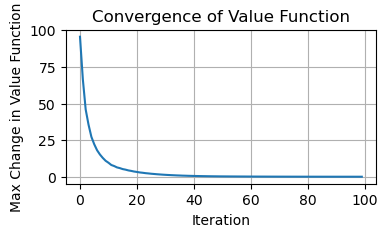

In [114]:
# Initialize the value function
V = (np.zeros([max_rows, max_columns]), 0)
# keep list of value functions
Vs = [V]
dV = []
num_iterations = 100 # feel free to change this value as needed
for _ in range(num_iterations):
    # perform Bellman update
    V_new, policy = bellman_update(V, gamma, action_set)
    # store the new value function
    Vs.append(V_new)
    dV.append(np.abs(V_new[0] - V[0]).max())

    # check for convergence
    if np.abs(V_new[0] - V[0]).max() < 1e-3:  #1e-3
        print("Converged!")
        break
    # update the value function
    V = V_new
    
    
start_state = (3,9) # pick a starting state
num_steps = 200 # feel free to change this value as needed
# simulate the trajectory
trajectory = simulate(start_state, policy, num_steps)

plt.figure(figsize=(4,2))
plt.plot(dV)
plt.title('Convergence of Value Function')
plt.xlabel('Iteration')
plt.ylabel('Max Change in Value Function')
plt.grid()

In [115]:
def plot_policy(policy):
    for (row, col), action in policy.items():
        if row is None or col is None:
            continue
        if action == "up":
            plt.text(col + 0.5, row + 0.5, '↑', ha='center', va='center', color='black', fontsize=8)
        elif action == "down":
            plt.text(col + 0.5, row + 0.5, '↓', ha='center', va='center', color='black', fontsize=8)
        elif action == "left":
            plt.text(col + 0.5, row + 0.5, '←', ha='center', va='center', color='black', fontsize=8)
        elif action == "right":
            plt.text(col + 0.5, row + 0.5, '→', ha='center', va='center', color='black', fontsize=8)


# compute the storm strength for each state for plotting later
storm_strength = np.zeros([max_rows, max_columns])
for state in state_space():
    if not is_terminal_state(state):
        storm_strength[state] = compute_omega_probability(state)
    

In [116]:
# visualize the value function and storm strength
@interact(iteration=(0,len(Vs)-1, 1), t=(0,len(trajectory)-1, 1))
def plot_value_function(iteration, t):
    plt.figure(figsize=(14,5))
    plt.subplot(1, 2, 1)
    plt.imshow(Vs[iteration][0], origin='lower', extent=[0, max_columns, 0, max_rows], cmap='viridis', interpolation='nearest')
    plt.colorbar(label='Value')
    plt.title('Value Function')
    plt.xlabel('Column')
    plt.ylabel('Row')
    plt.xticks(ticks=np.arange(0.5, max_columns, 1), labels=np.arange(0, max_columns))
    plt.yticks(ticks=np.arange(0.5, max_rows, 1), labels=np.arange(0, max_rows))
    plt.scatter(storm_eye[1] + 0.5, storm_eye[0] + 0.5, c='cyan', s=100, label='Storm Eye')
    for fire_state in fire_states:
        plt.scatter(fire_state[1] + 0.5, fire_state[0] + 0.5, c='red', s=100)
    plt.scatter(fire_state[1] + 0.5, fire_state[0] + 0.5, c='red', s=100, label='Fire State')
    for goal_state in goal_states:
        plt.scatter(goal_state[1] + 0.5, goal_state[0] + 0.5, c='green', s=100, label='Goal State')
        
    # Overlay the policy
    plot_policy(policy)
    # Plot the trajectory
    trajectory_x = [state[1] + 0.5 for state in trajectory]
    trajectory_y = [state[0] + 0.5 for state in trajectory]
    plt.plot(trajectory_x, trajectory_y, color='orange', label='Trajectory', linewidth=2)
    plt.scatter(trajectory_x[t], trajectory_y[t], color='orange', s=100, label='Current State')
    plt.legend(loc="lower left", framealpha=0.6)
    
    plt.subplot(1, 2, 2)
    plt.imshow(storm_strength, origin='lower', extent=[0, max_columns, 0, max_rows], cmap='viridis', interpolation='nearest')
    plt.colorbar(label='Storm Strength')
    plt.title('Storm Strength')
    plt.xlabel('Column')
    plt.ylabel('Row')
    plt.xticks(ticks=np.arange(0.5, max_columns, 1), labels=np.arange(0, max_columns))
    plt.yticks(ticks=np.arange(0.5, max_rows, 1), labels=np.arange(0, max_rows))
    plt.show()

interactive(children=(IntSlider(value=50, description='iteration'), IntSlider(value=31, description='t', max=6…

# Problem 3 (Linear Quadratic Regulator)

In class, we looked at the (discrete-time) non-time-varying Linear Quadratic Regular problem. Briefly, the goal is to find a sequence of control inputs $\mathbf{u}=(u_0, u_1,...,u_{N-1})$, for a time horizon of $N$ time steps, that minimizes the (quadratic) cost 

$$
J(\mathbf{x}, \mathbf{u}) = \left[\sum_{k=0}^{N-1} \underbrace{
x_k^TQx_k + u_k^TRu_k}_{\text{Running cost}}\right] + \underbrace{x_N^TQ_Nx_N}_{\text{Terminal cost}}
$$

where $Q = Q^T \geq 0, k=0,...,T$, $R=R^T >0$, and subject to linear dynamics $x_{k+1} = Ax_k + B u_k$. Noting that there are no constraints on states and controls, aside from the fact that the system must start from the current state $x_0=x_\mathrm{curr}$ and obey the linear dynamics.
If we assume the value function took the form of $V(x,k) = x^TP_kx$, then we can compute the value for any state at any time step $k$ using the following recursion update rule

$$
P_{k} = Q + A^TP_{k+1}A - A^TP_{k+1}B(R+B^TP_{k+1}B)^{-1}B^TP_{k+1}A, \qquad \text{for}\; k=N-1,...,0,
$$

and the corresponding optimal gain $K_k$ where $u_k^\star = K_kx_k$ is given by

\begin{equation}
    K_k = -(R+B^TP_{k+1}B)^{-1}B^TP_{k+1}A, \qquad \text{for}\; k=0,...,N-1
\end{equation}

## (a) LQR with cross term

Consider a slightly different case where the running cost has a cross term $2x_k^TS_ku_k$. That is,

$$
\tilde{J}(\mathbf{x}, \mathbf{u}) = \left[\sum_{k=0}^{N-1} 
        x_k^TQx_k + u_k^TRu_k + \underbrace{2x_k^TSu_k}_{\text{Cross term}}\right] + x_N^TQ_Nx_N,
$$

where $S \in \mathbb{R}^{n\times m}, \begin{bmatrix} Q & S \\ S^T & R\end{bmatrix}  \geq 0$ for $k=0,...,N-1$.
What is the corresponding update equation for $P_{k}$ and gain $K_k$ with the cross term present? We are still considering a time-invariant case (i.e., $A, B, Q, R, S$ are constants that do not change over time).



[Show work here...]

## (b) Time-varying LQR

For standard LQR (i.e., without the cross term introduced in the previos part), what is the corresponding update equation for $P_{k}$ and gain $K_k$ if the dynamics are time-varying? That is, when $x_{k+1} = A_kx_k + B_ku_k$, where $A_k$ and $B_k$ are dependent on $k$.



[Show work here...]

## (c) Dynamic programming vs. convex optimization

The dynamic programming method we discussed in class is a method of analytically solving a minimization problem in closed form, minimizing the cost $J(\mathbf{x}, \mathbf{u})$ subject to the constraint $x_{k+1} = Ax_k + Bu_k$. But since the cost function and constraint set are both convex, we can also use convex optimization methods to solve the same problem numerically.

Consider an LQR problem with

$$
A = \begin{bmatrix}
1 & 0 & 0.1 & 0 \\
0 & 1 & 0 & 0.1 \\
0 & 0 & 1 & 0 \\
0 & 0 & 0 & 1
\end{bmatrix},\quad B = \begin{bmatrix}
0.005 & 0 \\
0 & 0.005 \\
0.1 & 0 \\
0 & 0.1
\end{bmatrix},
$$

and $R = I, Q = 3I, Q_N = 10I$, and $N = 10$. The initial state is $x_{init} = [1, 2, -0.25, 0.5]$. These data are given in the cell immediately below.

In [127]:
# Problem data (given)

# These are the result of discretizing 2D double integrator dynamics with zero-order hold and dt = 0.1
A = np.array([[1, 0, 0.1, 0],
              [0, 1, 0, 0.1],
              [0, 0, 1, 0],
              [0, 0, 0, 1]])

B = np.array([[0.005, 0],
              [0, 0.005],
              [0.1, 0],
              [0, 0.1]])

# LQR cost matrices
Q = 3 * np.eye(4)
R = np.eye(2)
Q_N = 10 * np.eye(4)


# Time horizon
N = 10

# Initial state
x_init = np.array([1, 2, -0.25, 0.5])
print(x_init)



[ 1.    2.   -0.25  0.5 ]


### (c)(i) Solution via LQR
In the following cell, find the finite-horizon LQR controller for each time step by the iterative LQR process, and simulate the trajectory over the given time horizon with the given initial state. The provided plotting code at the end of the cell will plot the resulting state trajectory and control history.

0 [ 1.    2.   -0.25  0.5 ]
1 [ 0.97285806  2.03620079 -0.29283878  0.22401571]
2 [ 0.94232013  2.04831536 -0.31791985  0.01827574]
3 [ 0.90998072  2.0427532  -0.32886841 -0.12951889]
4 [ 0.87709773  2.02478032 -0.32879137 -0.22993862]
5 [ 0.84463981  1.99867853 -0.32036703 -0.29209733]
6 [ 0.81332519  1.96787891 -0.30592527 -0.32389498]
7 [ 0.78365294  1.93507239 -0.28751979 -0.33223534]
8 [ 0.75592726  1.90229948 -0.26699388 -0.32322304]


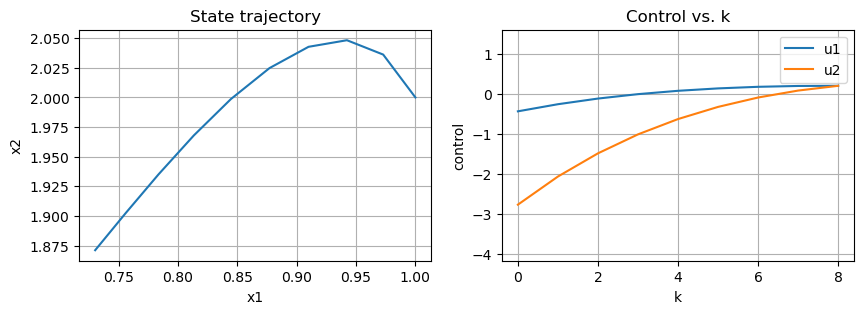

In [ ]:
# LQR implementation goes in this cell

P_matrices = []
K_matrices = []

x_trajectory_lqr = np.zeros((N,4))
u_history_lqr = np.zeros((N-1, 2))





###### FILL CODE HERE ######

# as a result of your code, the P_matrices list defined above should contain the ten P matrices in increasing order of time,
# and the K_matrices list defined above should contain the nine K matrices in increasing order of time.
#
# x_trajectory_lqr should contain the complete state trajectory (with the k-th row of x_trajectory_lqr containing
# the state at time k), and likewise u_history_lqr should contain the complete control history (with the k-th row
# of u_history_lqr containing the control at time k).

P = Q_N 
P_matrices.append(P)

# Backwards recursion for K and P 
for k in reversed(range(N-1)):
    K = np.linalg.inv(R + B.T @ P @ B) @ (B.T @ P @ A)
    K_matrices.insert(0,K) #insert at beginning of array. First term will end up in 0th position
    P = Q + A.T @ P @ (A - B @ K)
    P_matrices.insert(0, P)

# Forward for x and u
x_trajectory_lqr[0] = x_init
for k in range(N-1):
    #print(k, x_trajectory_lqr[k])
    U = -K_matrices[k] @ x_trajectory_lqr[k] # u_k = -k_k @ x_k
    u_history_lqr[k] = U #add to back of list
    X = A @ x_trajectory_lqr[k] + B @ u_history_lqr[k]
    x_trajectory_lqr[k+1] = X
##########################################

# Provided plotting code
plt.figure(figsize=(10, 3))
plt.subplot(1,2,1)
plt.plot(x_trajectory_lqr[:,0], x_trajectory_lqr[:,1])
plt.title("State trajectory")
plt.xlabel("x1")
plt.ylabel("x2")
plt.axis("equal")
plt.grid()

plt.subplot(1,2,2)
plt.plot(range(N-1), u_history_lqr[:,0], label="u1")
plt.plot(range(N-1), u_history_lqr[:,1], label="u2")
plt.legend()
plt.title("Control vs. k")
plt.xlabel("k")
plt.ylabel("control")
plt.axis("equal")
plt.grid()


### (c)(ii) Solution via convex optimization
In the following cell, directly find a state trajectory and control history that solves the same LQR optimization problem using cvx. The provided plotting code at the end of the cell will plot the resulting state trajectory and control history.

Hint: you may find the cvxpy function `quad_form` (documented [here](https://www.cvxpy.org/api_reference/cvxpy.atoms.other_atoms.html#quad-form)) useful. Since $Q$ and $R$ are both positive (semi)definite, the quadratic forms $x^TQx$ and $u^TRu$ are convex, but because of subtleties of [the way cvxpy works](https://www.cvxpy.org/tutorial/dcp/index.html), cvxpy does not immediately recognize those expressions as convex in general. `quad_form` provides additional information to cvxpy that allows it to determine the convexity of those expressions.

In [119]:
import cvxpy as cp

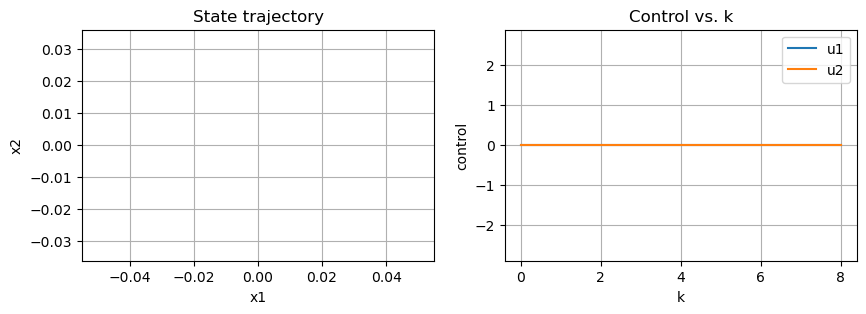

In [120]:
# CVX implementation goes in this cell

x_trajectory_cvx = np.zeros((N,4))
u_history_cvx = np.zeros((N-1, 2))

###### FILL CODE HERE ######

# As a result of your code, x_trajectory_cvx should contain the complete state trajectory (with the k-th row of x_trajectory_cvx containing
# the state at time k), and likewise u_history_cvx should contain the complete control history (with the k-th row of u_history_cvx
# containing the control at time k).



######################################################

# Provided plotting code
plt.figure(figsize=(10, 3))
plt.subplot(1,2,1)
plt.plot(x_trajectory_cvx[:,0], x_trajectory_cvx[:,1])
plt.title("State trajectory")
plt.xlabel("x1")
plt.ylabel("x2")
plt.axis("equal")
plt.grid()

plt.subplot(1,2,2)
plt.plot(range(N-1), u_history_cvx[:,0], label="u1")
plt.plot(range(N-1), u_history_cvx[:,1], label="u2")
plt.legend()
plt.title("Control vs. k")
plt.xlabel("k")
plt.ylabel("control")
plt.axis("equal")
plt.grid()

## (d) Open-loop vs. closed-loop

You should have gotten the same results from LQR and cvxpy in the previous part. LQR is a method of designing a _closed-loop controller_ that minimizes $J(\mathbf{x}, \mathbf{u})$. In contrast, the trajectory optimization with cvxpy is an _open-loop_ method, which designs an entire trajectory in advance and provides a numerical sequence of control inputs to achieve that trajectory; notably, the sequence of control inputs is given as a fixed, independent output of the optimizer, without reference to whatever the state may be at any point along the trajectory.

When and why might we prefer one technique over the other? Discuss.

P.S. Run the cell below to check that the solutions found by both methods match.

In [121]:
print("States match:", np.allclose(x_trajectory_cvx, x_trajectory_lqr))
print("Controls match:", np.allclose(u_history_cvx, u_history_lqr))

States match: True
Controls match: True


# Problem 4 (Trajectory optimization - sequential quadratic programming)

In this problem, you will explore sequential quadratic programming, an algorithm where you successively convexify your nonlinear trajectory optmization problem about a previous solution, and reduce the problem into a quadratic program.
Assuming the cost objective is already quadratic, the bulk of the convexification will be focused on linearizing the dynamics and constraints about a previous solution.

Below is an implementation of SQP with a dynamically extended simple car model avoiding *one* circular obstacle. You should read each line of the code; the following questions will be based on your understanding of the SQP algorithm and following implementation.

The dynamically extended simple car has the following dynamics:

$$
\begin{bmatrix}
\dot{x} \\ \dot{y} \\ \dot{\theta} \\ \dot{v}
\end{bmatrix}
= 
\begin{bmatrix}
v\cos\theta\\ v\sin\theta \\ \frac{v}{L}\tilde{\delta} \\ a
\end{bmatrix}, \qquad u = \begin{bmatrix} \tilde{\delta} \\ a \end{bmatrix} \: \text{where} \: \tilde{\delta} = \tan\delta
$$

Note: We have made the substitution $\tilde{\delta} = \tan\delta$ so that the system is control affine since the mapping is bijective over $(-\pi/2, \pi/2)$

Let $g(x; x_\mathrm{ob}, r)$ denote a function that measure how far away the state $x$ is from a circular obstacle centered at $x_\mathrm{ob}$ with radius $r$. 


You need to install a new package `dynamaxsys`.
You can install it by running 
```
pip install dynamaxsys==0.0.3
```

Alternatively, you can clone it locally by following the instructions here `https://github.com/UW-CTRL/dynamaxsys.git`

In [122]:

import cvxpy as cp # import cvxpy

# in this problem, we will use the dynamaxsys library to import dynamical systems implemented in JAX: https://github.com/UW-CTRL/dynamaxsys
from dynamaxsys.simplecar import DynamicallyExtendedSimpleCar
from dynamaxsys.base import get_discrete_time_dynamics
from dynamaxsys.utils import linearize


import jax
import jax.numpy as jnp
import matplotlib.pyplot as plt
import numpy as np
import functools
import functools
from ipywidgets import interact


ModuleNotFoundError: No module named 'dynamaxsys'

In [ ]:
# define the robot dynamics
wheelbase = 1.0
dt = 0.1
ct_robot_dynamics = DynamicallyExtendedSimpleCar(wheelbase=wheelbase) # robot dynamics
dt_robot_dynamics = get_discrete_time_dynamics(ct_robot_dynamics, dt=dt) # discrete time dynamics
state_dim = dt_robot_dynamics.state_dim
control_dim = dt_robot_dynamics.control_dim


In [ ]:
# some helper functions

# define obstacle function g(x) >= 0
# where g(x) is the distance from the obstacle
@jax.jit
def obstacle_constraint(state, obstacle, radius):
    return jnp.linalg.norm(state[:2] - obstacle[:2]) - radius

# function to simulate the discrete time dynamics given initial state and control sequence
@functools.partial(jax.jit, static_argnames=["dt_dynamics"])
def simulate_discrete_time_dynamics(dt_dynamics, state, controls, t0, dt):
    states = [state]
    t = t0
    for c in controls:
        state = dt_dynamics(state, c, t)
        states.append(state)
        t += dt
    return jnp.stack(states)

# jit the linearize constraint functions to make it run faster
linearize_obstacle = jax.jit(jax.vmap(jax.grad(obstacle_constraint), in_axes=[0, None, None]))

In [ ]:
# set up the problem parameters
planning_horizon = 25 # length of the planning horizon
num_time_steps = 50 # number of time steps to simulate
num_sqp_iterations = 15 # number of SQP iterations
t = 0. # this doesn't affect anything, but a value is needed 

# control and velocity limits
v_max = 1.5
v_min = 0.
acceleration_max = 1.0
acceleration_min = -1.0
steering_max = 0.5
steering_min = -0.5

# obstacle parameters
obstacle_location = jnp.array([1.0, 0.0]) # obstacle location
obstacle_radius = 0.5 # obstacle radius
robot_radius = 0.1 # robot radius


## (a) The inner quadratic program problem

Take a close look at the following two cells. Let $x^\mathrm{prev}_t$ and $u^\mathrm{prev}_t$ denote the state and control at time $t$ from the *previous* SQP iteration.
Write out the exact quadratic program that is being solved at each SQP iteration. Keep variables/parameters in terms of their names and don't use their numerical values. For example, use $\beta_1$ instead of 0.2.


Additionally, describe what each term in the problem represents, and the expression for them. That is, define mathematically what they are using mathematical expressions, their role within the optimization problem, and describe in words the interpretation of them. 


Write the QP here....

$$ ... $$

In [ ]:
# set up cvxpy problem variables and parameters
xs = cp.Variable([planning_horizon+1, state_dim])  # cvx variable for states
us = cp.Variable([planning_horizon, control_dim])  # cvx variable for controls
slack = cp.Variable(1) # slack variable to make sure the problem is feasible
As = [cp.Parameter([state_dim, state_dim]) for _ in range(planning_horizon)]  # parameters for linearized dynamics
Bs = [cp.Parameter([state_dim, control_dim]) for _ in range(planning_horizon)] # parameters for linearized dynamics
Cs = [cp.Parameter([state_dim]) for _ in range(planning_horizon)] # parameters for linearized dynamics

Gs = [cp.Parameter([state_dim]) for _ in range(planning_horizon+1)] # parameters for linearized constraints
hs = [cp.Parameter(1) for _ in range(planning_horizon+1)] # parameters for linearized constraints

xs_previous = cp.Parameter([planning_horizon+1, state_dim]) # parameter for previous solution
us_previous = cp.Parameter([planning_horizon, control_dim]) # parameter for previous solution
initial_state = cp.Parameter([state_dim]) # parameter for current robot state

In [ ]:
# set up cvxpy problem cost and constraints
beta1 = 0.2 # coefficient for control effort
beta2 = 5. # coefficient for progress
beta3 = 10. # coefficient for trust region
slack_penalty = 1000. # coefficient for slack variable
markup = 1.05

objective = beta2 * (xs[-1,2]**2 + xs[-1,1]**2 - xs[-1,0]) + beta3 * (cp.sum_squares(xs - xs_previous) + cp.sum_squares(us - us_previous)) + slack_penalty * slack**2
constraints = [xs[0] == initial_state, slack >= 0] # initial state and slack constraint
for t in range(planning_horizon):
    objective += (beta1 * cp.sum_squares(us[t]) + beta1 * (xs[t,2]**2 + xs[t,1]**2 - xs[t,0]) ) * markup**t
    constraints += [xs[t+1] == As[t] @ xs[t] + Bs[t] @ us[t] + Cs[t]] # dynamics constraint
    constraints += [xs[t,-1] <= v_max, xs[t,-1] >= v_min, us[t,1] <= acceleration_max, us[t,1] >= acceleration_min, us[t,0] <= steering_max, us[t,0] >= steering_min] # control and velocity limit constraints
    constraints += [Gs[t] @ xs[t] + hs[t] >= -slack] # linearized collision avoidance constraint
constraints += [xs[planning_horizon,-1] <= v_max, xs[planning_horizon,-1] >= v_min, Gs[planning_horizon] @ xs[planning_horizon] + hs[planning_horizon] >= -slack] # constraints for last planning horizon step
prob = cp.Problem(cp.Minimize(objective), constraints) # construct problem
  

In [ ]:
# initial states
robot_state = jnp.array([-1.5, -0.1, 0., 1.])  # robot starting state
robot_trajectory = [robot_state] # list to collect robot's state as it replans
sqp_list = [] # list to collect each sqp iteration 
robot_control_list = []  # list to collect robot's constrols as it replans
robot_trajectory_list = [] # list to collect robot's planned trajectories

# initial robot planned state and controls
previous_controls = jnp.zeros([planning_horizon, control_dim]) # initial guess for robot controls
previous_states =  simulate_discrete_time_dynamics(dt_robot_dynamics, robot_state, previous_controls, 0., dt) # initial guess for robot states
xs_previous.value = np.array(previous_states) # set xs_previous parameter value
us_previous.value = np.array(previous_controls) # set us_previous parameter value 

## (b) The planning loop

In the follow cell is the main loop where the planning at each time step occurs. At each time step, multiple SQP iterations are performed (either until convergence or for some fixed number of iterations).
The cell is intentionally uncommented. Please add comments to each line of code, giving a brief description of the purpose/function of each line of code.

In [ ]:
##### ADD COMMENTS TO EXPLAIN THE SQP SOLVER #####

solver = cp.CLARABEL

for t in range(num_time_steps):
    initial_state.value = np.array(robot_state)
    sqp_solutions = [previous_states]
    
    for i in range(num_sqp_iterations):
        As_value, Bs_value, Cs_value = jax.vmap(linearize, in_axes=[None, 0, 0, None])(dt_robot_dynamics, previous_states[:-1], previous_controls, 0.)
        Gs_value = linearize_obstacle(previous_states, obstacle_location, obstacle_radius + robot_radius) 
        hs_value = jax.vmap(obstacle_constraint, [0, None, None])(previous_states, obstacle_location, obstacle_radius + robot_radius) - jax.vmap(jnp.dot, [0, 0])(Gs_value, previous_states)

        for i in range(planning_horizon):
            As[i].value = np.array(As_value[i])
            Bs[i].value = np.array(Bs_value[i])
            Cs[i].value = np.array(Cs_value[i])
            Gs[i].value = np.array(Gs_value[i])
            hs[i].value = np.array(hs_value[i:i+1])
        Gs[planning_horizon].value = np.array(Gs_value[planning_horizon])
        hs[planning_horizon].value = np.array(hs_value[planning_horizon:planning_horizon+1])
        
        result = prob.solve(solver=solver)

        previous_controls = us.value
        previous_states =  simulate_discrete_time_dynamics(dt_robot_dynamics, robot_state, previous_controls, 0., dt)
        sqp_solutions.append(previous_states)
        xs_previous.value = np.array(previous_states)
        us_previous.value = np.array(previous_controls)
    sqp_list.append(np.stack(sqp_solutions))
    robot_control = previous_controls[0]
    robot_control_list.append(robot_control)
    robot_state = dt_robot_dynamics(robot_state, robot_control, 0.)
    robot_trajectory.append(robot_state)
    robot_trajectory_list.append(previous_states)
    previous_states =  simulate_discrete_time_dynamics(dt_robot_dynamics, robot_state, previous_controls, 0., dt)
    
    
robot_trajectory = jnp.stack(robot_trajectory)
robot_controls = jnp.stack(robot_control_list)

In [ ]:
# plotting the results. No need to add comments here. Just run this cell to visualize the results
@interact(i=(0,num_time_steps-1), j=(0,num_sqp_iterations-1))
def plot(i, j):
    fig, axs = plt.subplots(1, 2, figsize=(12, 4), gridspec_kw={'width_ratios': [2, 1]})
    # fig, axs = plt.subplots(1,2, figsize=(10, 4))
    ax = axs[0]
    robot_position = robot_trajectory[i, :2]
    circle1 = plt.Circle(robot_position, robot_radius, color='C0', alpha=0.4)
    circle2 = plt.Circle(obstacle_location, obstacle_radius, color='C1', alpha=0.4)
    ax.add_patch(circle1)
    ax.add_patch(circle2)
    ax.plot(robot_trajectory[:,0], robot_trajectory[:,1], "o-", markersize=3, color='black')
    ax.plot(robot_trajectory_list[i][:,0], robot_trajectory_list[i][:,1], "o-", markersize=3, color='red', label="planned")
    # Plot planned trajectory for the selected SQP iteration
    planned_trajectory = sqp_list[i][j]
    ax.plot(planned_trajectory[:, 0], planned_trajectory[:, 1], "o-", markersize=3, color='green', alpha=0.4, label="Planned Trajectory")
    ax.scatter(robot_trajectory[i:i+1,0], robot_trajectory[i:i+1,1], s=30,  color='C0', label="Robot")
    ax.set_xlim([-2, 7])
    ax.grid()
    ax.legend()
    ax.axis("equal")

    ax.set_title("heading=%.2f velocity=%.2f"%(robot_trajectory[i,2], robot_trajectory[i,3]))
    
    ax = axs[1]
    plt.plot(robot_controls)
    plt.scatter([i], robot_controls[i:i+1, 0], label="$tan(\\delta)$", color='C0')
    plt.scatter([i], robot_controls[i:i+1, 1], label="Acceleration", color='C1')

    plt.hlines(steering_min, 0, num_time_steps-1, color='C0', linestyle='--')
    plt.hlines(steering_max, 0, num_time_steps-1, color='C0', linestyle='--')
    plt.hlines(acceleration_min, 0, num_time_steps-1, color='C1', linestyle='--')
    plt.hlines(acceleration_max, 0, num_time_steps-1, color='C1', linestyle='--')
    
    plt.plot(robot_trajectory[:,-1], markersize=3, color='C2')
    plt.scatter([i], robot_trajectory[i:i+1, 3], label="Velocity", color='C2')
    plt.hlines(v_min, 0, num_time_steps-1, color='C2', linestyle='--')
    plt.hlines(v_max, 0, num_time_steps-1, color='C2', linestyle='--')
    ax.set_xlim([0, num_time_steps])
    ax.set_ylim([-2, 2])
    ax.set_xlabel("Time step")
    ax.set_ylabel("Control")
    ax.set_title("Velocity, steering and acceleration")
    ax.legend()
    ax.grid()

## (c) Add another obstacle
Great! You have just planned a robot trajectory using the SQP algorithm! 
After parsing through all the code, perhaps you could have written that up yourself from scratch right?
Now, edit the code above to add another obstacle of the same size centered at $(3, -0.5)$ and amend your answer to (a) to include the second obstacle.



## (d) Try out different parameter values
Try out different parameter values, cost functions, obstacle size/locations, etc and see what kind of behaviors emerge. 
As you investigate, think about things like "Are there instances where the solution isn't very good? Why is that so?" or "How much does initial guess matter?" or "Are the obstable constraints always satisfied?"
You can come up with your own questions to guide your exploration.

Share your findings/insights based on your exploration.